# SO(5) Richardson Gaudin

First, let's import the functions and packages we need we need

In [1]:
from solve_rg_eqs import solve_rgEqs, solve_rgEqs_2, G_to_g
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Setting physical parameters. 

Note that $g$ is not $GL$, but instead
$g = \frac{G}{1-G\sum_k k}$. At $G_c = \frac{1}{\sum_k k}$, $g$ becomes singular. So, around this point I switch to using $1/g$ in the code.

Due to assumptions in the code, I currently require Nup and Ndown to be even numbers.

In [52]:
L = 4 # Very small system, just an illustration
Nup = 2
Ndown = 2

N = Nup + Ndown

dims = (L, Nup, Ndown)

# G_final = 1.5*(2/(np.pi*L)) # 1.5 times critical coupling?
G_final = -0.5
k = np.arange(1, 2*L+1, 2)*0.5*np.pi/L

Setting numerical parameters. If the following things don't work, try decreasing ``dg`` (which will change the other parameters as well). If you want more (or less) points in the output, decrease (increase) the value of ``skip``, which sets how often we remove artificial imaginary parts and save values to output (i.e. skip ``skip`` values of ``g`` before doing this).

In [3]:
dg = 0.01/N # step size of g. Scaling with N instead of L because increasing N increases difficulty
g0 = .01*dg # initial value of g
imk = dg # scale of the imaginary parts added to k
imv = .01*g0 # scale of the imaginary parts used in the initial guess

if N/(4*L) < 0.5:
    skip = 4*L # number of steps between times we remove imaginary parts
else:
    skip = 10*L 

Solving the Richardson-Gaudin equations.

Watch out, this could take a while. It will increment ``g`` from ``g0`` until
it has trouble converging, at which point it switches to incrementing ``1/g``.

Also, ignore things that look like error messages. 

## Wait for the evaluation to complete!
## The [*]: to the left of this should turn into a number [x]:

In [4]:
if G_final > 1./np.sum(k):
    # Need to use different code to pass the critical point
    output_df = solve_rgEqs_2(dims, G_final, k, dg=dg, g0=g0, imscale_k=imk,
                              imscale_v=imv, skip=skip)
else:
    # Can just increment g
    output_df = solve_rgEqs(dims, G_final, k, dg=dg, g0=g0, imscale_k=imk,
                            imscale_v=imv, skip=1)

Initial guesses:
[0.39269523+0.00249999j 0.39269523+0.00249996j]
[0.3926978+0.00249919j 0.3926978+0.00250079j]
First, boostrapping from 4 to 4 fermions

Now using 4 fermions

Bad initial guess. Trying with noise.
g = -2.4996073625936408e-05, er = 0.0011339217949799243
1th try at g = -2.4996073625936408e-05
Smallest error from last set: 0.0011339217949799243
Noise ranges from -2.694612926507145e-07 to 1.913210337454274e-07
Error with 4 fermions: 1.6944063779362582e-11
Removing im(k) at g = -0.002497617205164472
Variables after removing im(k)
[0.393609  +7.06321758e-20j 0.39294248-5.05417617e-21j]
[0.39327536-0.00019241j 0.39327536+0.00019241j]
Stored values at -0.002497617205164472
Removing im(k) at g = -0.004894573013680872
Variables after removing im(k)
[0.39447959-1.60738217e-19j 0.3931746 -9.37074559e-21j]
[0.39382565-0.00037672j 0.39382565+0.00037672j]
Stored values at -0.004894573013680872
Removing im(k) at g = -0.0072192843395370845
Variables after removing im(k)
[0.39532142+6.88

Variables after removing im(k)
[0.41325951-2.02062174e-18j 0.3980165 +1.37007456e-19j]
[0.40544709-0.00439821j 0.40544709+0.00439821j]
Stored values at -0.0586937550273793
Removing im(k) at g = -0.05968491894281289
Variables after removing im(k)
[0.41359067+2.91915379e-18j 0.39809932+1.37775316e-19j]
[0.40564791-0.0044698j 0.40564791+0.0044698j]
Stored values at -0.05968491894281289
Removing im(k) at g = -0.06065671601483506
Variables after removing im(k)
[0.4139148 -1.13201483e-18j 0.39818031+7.66658383e-20j]
[0.40584434-0.00453989j 0.40584434+0.00453989j]
Stored values at -0.06065671601483506
Removing im(k) at g = -0.061609708379063
Variables after removing im(k)
[0.41423213-5.19565882e-19j 0.39825952-3.20605099e-19j]
[0.40603652-0.00460852j 0.40603652+0.00460852j]
Stored values at -0.061609708379063
Removing im(k) at g = -0.0625444366244319
Variables after removing im(k)
[0.41454286-2.05462163e-19j 0.39833701+1.38998449e-20j]
[0.40622458-0.00467575j 0.40622458+0.00467575j]
Stored va

Variables after removing im(k)
[0.42259027+1.76275646e-19j 0.40032082-3.45711312e-19j]
[0.41105387-0.00642236j 0.41105387+0.00642236j]
Stored values at -0.08732398845104782
Removing im(k) at g = -0.08783214201823868
Variables after removing im(k)
[0.42275139+7.33840239e-19j 0.40036011+2.88242035e-19j]
[0.41114977-0.00645743j 0.41114977+0.00645743j]
Stored values at -0.08783214201823868
Removing im(k) at g = -0.0883331564305728
Variables after removing im(k)
[0.4229101 -6.14699719e-19j 0.40039879-6.40394866e-19j]
[0.41124421-0.00649198j 0.41124421+0.00649198j]
Stored values at -0.0883331564305728
Removing im(k) at g = -0.08882718108777711
Variables after removing im(k)
[0.42306645-6.40655599e-19j 0.40043688-3.01272258e-19j]
[0.4113372-0.00652602j 0.4113372+0.00652602j]
Stored values at -0.08882718108777711
Removing im(k) at g = -0.08931436124984317
Variables after removing im(k)
[0.42322048-2.86650540e-19j 0.40047439+1.91767399e-20j]
[0.41142879-0.00655955j 0.41142879+0.00655955j]
Store

Variables after removing im(k)
[0.42756556-1.22459630e-18j 0.40152669+8.16856997e-20j]
[0.41400111-0.00750689j 0.41400111+0.00750689j]
Stored values at -0.10325484562733694
Removing im(k) at g = -0.10356307835988149
Variables after removing im(k)
[0.42766026-9.22825564e-19j 0.4015495 -3.88382631e-19j]
[0.41405693-0.00752757j 0.41405693+0.00752757j]
Stored values at -0.10356307835988149
Removing im(k) at g = -0.10386793054662159
Variables after removing im(k)
[0.42775387+1.53269632e-18j 0.40157205+3.49996621e-19j]
[0.4141121-0.007548j 0.4141121+0.007548j]
Stored values at -0.10386793054662159
Removing im(k) at g = -0.10416945749850413
Variables after removing im(k)
[0.42784639+3.92378777e-18j 0.40159432+1.92792961e-19j]
[0.41416662-0.0075682j 0.41416662+0.0075682j]
Stored values at -0.10416945749850413
Removing im(k) at g = -0.1044677133263912
Variables after removing im(k)
[0.42793786-3.49707428e-18j 0.40161634+2.33230415e-19j]
[0.41422051-0.00758817j 0.41422051+0.00758817j]
Stored val

Variables after removing im(k)
[0.43065183+8.43727498e-19j 0.40226755+4.69443165e-19j]
[0.41581509-0.00818115j 0.41581509+0.00818115j]
Stored values at -0.11340204348492075
Removing im(k) at g = -0.1136087364921748
Variables after removing im(k)
[0.43071402-1.48491883e-18j 0.40228242+9.89506867e-20j]
[0.41585153-0.00819475j 0.41585153+0.00819475j]
Stored values at -0.1136087364921748
Removing im(k) at g = -0.11381357038811744
Variables after removing im(k)
[0.43077563+2.77475171e-18j 0.40229716-1.84899487e-19j]
[0.41588762-0.00820822j 0.41588762+0.00820822j]
Stored values at -0.11381357038811744
Removing im(k) at g = -0.11401657014326365
Variables after removing im(k)
[0.43083666-2.62653548e-18j 0.40231175-3.55498676e-19j]
[0.41592338-0.00822157j 0.41592338+0.00822157j]
Stored values at -0.11401657014326365
Removing im(k) at g = -0.11421776028293533
Variables after removing im(k)
[0.43089712+6.15258040e-19j 0.4023262 -4.09977865e-20j]
[0.41595879-0.00823479j 0.41595879+0.00823479j]
Sto

Variables after removing im(k)
[0.4327517 +4.56748762e-18j 0.40276868-3.04316628e-19j]
[0.4170432-0.0086405j 0.4170432+0.0086405j]
Stored values at -0.12043130520723229
Removing im(k) at g = -0.12057946909689955
Variables after removing im(k)
[0.43279563+1.65684447e-18j 0.40277914-6.93570552e-19j]
[0.41706884-0.00865011j 0.41706884+0.00865011j]
Stored values at -0.12057946909689955
Removing im(k) at g = -0.12072650350261194
Variables after removing im(k)
[0.4328392 -3.95138482e-19j 0.40278952+2.63268252e-20j]
[0.41709427-0.00865965j 0.41709427+0.00865965j]
Stored values at -0.12072650350261194

Final error:
2.358986852131173e-15
Calculating R_k, energy


OK, that took a while. If there's a big pink error message about division by zero, ignore it for now.

If you see an error that says something about child processes, I suggest restarting the kernel and rerunning.

Let's look at the output, stored in a Pandas DataFrame.

To store it as a CSV, uncomment lines 2 and 3 below and input a filename when prompted. Line 4 is an example of how to load the data (or other CSV data) into a Pandas dataframe.

In [5]:
print(output_df)
# filename = input('Name to save file to: ')
# output_df.to_csv(filename)
# new_df = pd.load_csv(filename)

            g         G   Re(e_0)       Im(e_0)  Re(omega_0)  Im(omega_0)  \
0   -0.002498 -0.002537  0.393609  7.063218e-20     0.393275    -0.000192   
1   -0.004895 -0.005050  0.394480 -1.607382e-19     0.393826    -0.000377   
2   -0.007219 -0.007562  0.395321  6.881857e-20     0.394357    -0.000555   
3   -0.009475 -0.010075  0.396136  5.853129e-21     0.394870    -0.000728   
4   -0.011665 -0.012587  0.396924  2.348780e-20     0.395365    -0.000895   
..        ...       ...       ...           ...          ...          ...   
194 -0.120132 -0.489950  0.432663 -3.061822e-18     0.416991    -0.008621   
195 -0.120282 -0.492463  0.432707  3.524671e-19     0.417017    -0.008631   
196 -0.120431 -0.494975  0.432752  4.567488e-18     0.417043    -0.008640   
197 -0.120579 -0.497488  0.432796  1.656844e-18     0.417069    -0.008650   
198 -0.120727 -0.500000  0.432839 -3.951385e-19     0.417094    -0.008660   

      Re(e_1)       Im(e_1)  Re(omega_1)  Im(omega_1)     energy       R_0 

# Using the results

## Pairons

Let's make a plot of the pairons. First, we need to get the results from the DataFrame. In output_df, the results for each pairon's real and imaginary part is stored as a row, with a name like ``Re(omega_0)``. To get one row, we can do as follows:

In [6]:
output_df['Re(e_0)']

0      0.393609
1      0.394480
2      0.395321
3      0.396136
4      0.396924
         ...   
194    0.432663
195    0.432707
196    0.432752
197    0.432796
198    0.432839
Name: Re(e_0), Length: 199, dtype: float64

I don't want to do this for every column I'm interested in. Let's make lists of these column names:

In [7]:
real_e_index = ['Re(e_{})'.format(i) for i in range(Nup)]
im_e_index = ['Im(e_{})'.format(i) for i in range(Nup)]
real_w_index = ['Re(omega_{})'.format(i) for i in range(Ndown)]
im_w_index = ['Im(omega_{})'.format(i) for i in range(Ndown)]

# Is this the thing we wanted?
print(real_e_index)
print(im_e_index)
print(real_w_index)
print(im_w_index)

['Re(e_0)', 'Re(e_1)']
['Im(e_0)', 'Im(e_1)']
['Re(omega_0)', 'Re(omega_1)']
['Im(omega_0)', 'Im(omega_1)']


Let's make a plot with labels and titles and legends!

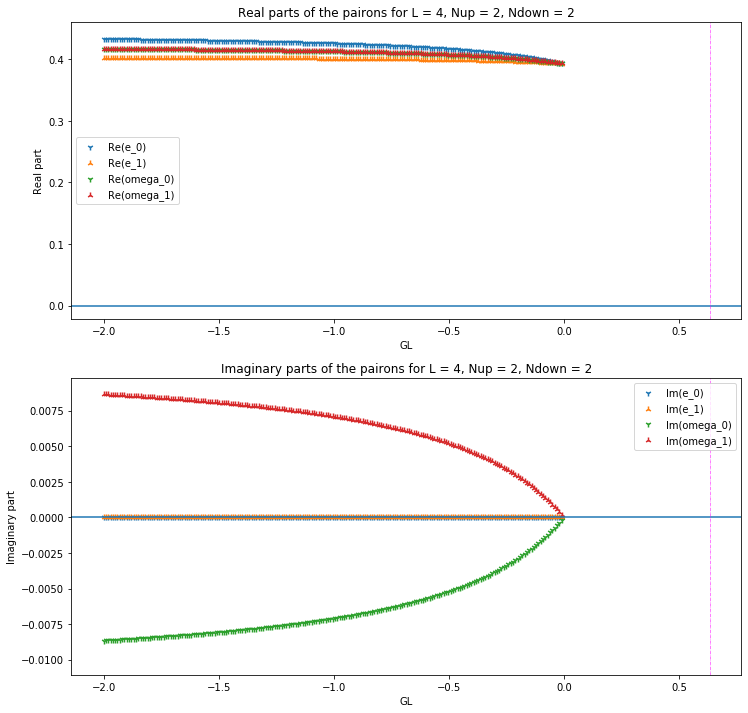

In [8]:
plt.figure(figsize=(12,12)) # Making a bigger figure for the plots

markers = ['1', '2', '3', '4', 'x', '+', '.', 'v', '^'] 
# using different shapes for the markers so we can see stacked results

plt.subplot(2,1,1) # Making 2 subplots, first for real parts
for i, ind in enumerate(real_e_index):
    # Plotting like before, but now assigning labels for the legend
    # Luckily, our rownames are decent labels already
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 
# Doing the same for real parts of omega
for i, ind in enumerate(real_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 

# Let's plot a horizontal line at 0
plt.axhline(0)

# Let's make a thin, vertical, dotted/dashed, magenta line at G_c
g_c = L/np.sum(k)
plt.axvline(g_c, ls='-.', color='magenta', linewidth=.5)
    
# Making axes labels
plt.title('Real parts of the pairons for L = {}, Nup = {}, Ndown = {}'.format(L, Nup, Ndown))
plt.xlabel('GL')
plt.ylabel('Real part')
plt.legend() 
    
plt.subplot(2,1,2) # Now moving to a second subplot
for i, ind in enumerate(im_e_index):
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 
for i, ind in enumerate(im_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 

plt.axhline(0)
plt.axvline(g_c, ls='-.', color='magenta', linewidth=.5)    
    
plt.title('Imaginary parts of the pairons for L = {}, Nup = {}, Ndown = {}'.format(L, Nup, Ndown))
plt.xlabel('GL')
plt.ylabel('Imaginary part')
plt.legend()

plt.show()

We can change the limits of the axes to get a closer look at the behavior around G_c:

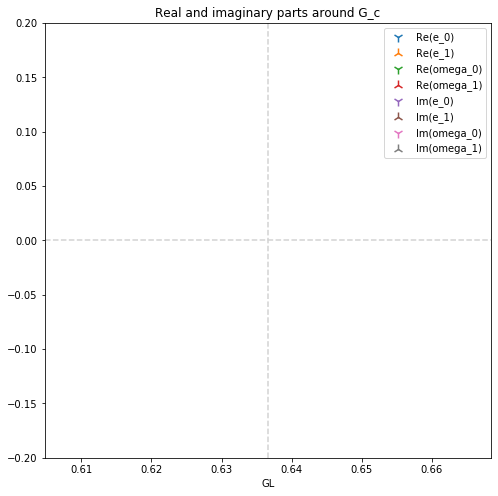

In [9]:
plt.figure(figsize=(8,8))

plt.axvline(g_c, ls = '--', color='lightgray')
plt.axhline(0, ls = '--', color='lightgray')

for i, ind in enumerate(real_e_index):
    # s is the size of the marks (not sure the units)
    # Let's make them bigger!
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(real_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(im_e_index):
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(im_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
    
plt.xlim(0.95*g_c, 1.05*g_c) # Looking within 5% of g_c
plt.ylim(-0.2, 0.2) # You might need to change these values

plt.legend()
plt.xlabel('GL')

plt.title('Real and imaginary parts around G_c')
plt.show()

As you probably noticed, the x-axis spacing isn't very even. 
This is because the relationship between G (our x axis) and g (the thing that is used in the Richardson-Gaudin equations).

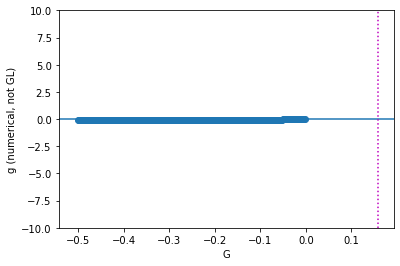

In [10]:
plt.scatter(output_df['G'], output_df['g'])
plt.xlabel('G')
plt.ylabel('g (numerical, not GL)')
plt.axhline(0)
plt.axvline(g_c/L, ls=':', color='m')
plt.ylim(-10, 10)
plt.show()

## Energy
We can also plot energy (and other things). Let's get the energy and derivatives from the output DataFrame.

Again, if there is a division by zero error, ignore it for now. This occurs if we are taking the derivative of something too close to vertical.

In [11]:
Es = output_df['energy']
Gs = output_df['G']
# Rescaling by appropriate factors of L
es = Es/L
gs = Gs*L # different than g in previous plot

print('Taking 1st derivative')
de = np.gradient(es, gs) # derivative de/dg
print('Taking 2nd derivative')
d2e = np.gradient(de, gs) # second derivative
print('Taking 3rd derivative')
d3e = np.gradient(d2e, gs) # third

Taking 1st derivative
Taking 2nd derivative
Taking 3rd derivative


Now, let's make a 2-by-2 plot with the energy and derivatives.

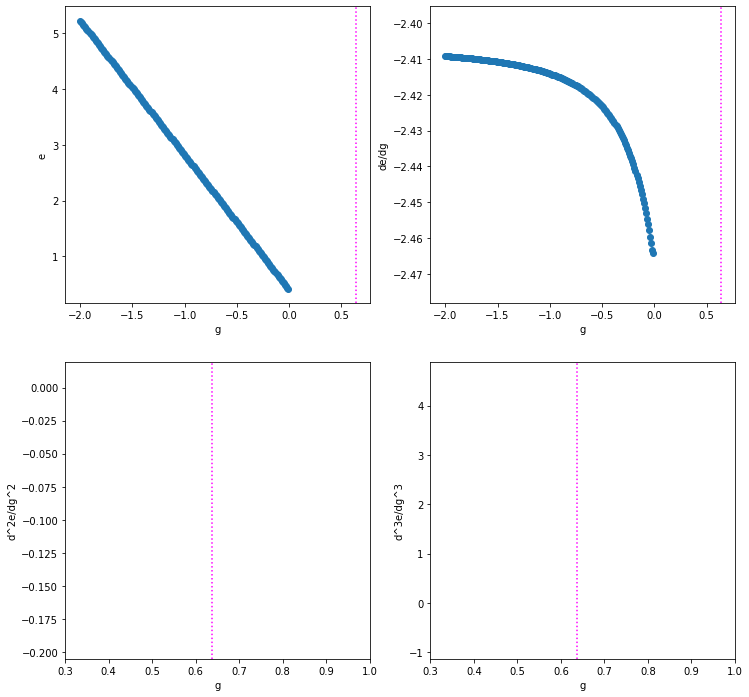

In [12]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(gs, es)
plt.xlabel('g')
plt.ylabel('e')
plt.axvline(g_c, ls=':', color='magenta')

plt.subplot(2, 2, 2)
plt.scatter(gs, de)
plt.xlabel('g')
plt.ylabel('de/dg')
plt.axvline(g_c, ls=':', color='magenta')


plt.subplot(2, 2, 3)
plt.scatter(gs, d2e)
plt.xlabel('g')
plt.ylabel('d^2e/dg^2')
plt.axvline(g_c, ls=':', color='magenta')
plt.xlim(0.3, 1.0)


plt.subplot(2, 2, 4)
plt.scatter(gs, d3e)
plt.xlabel('g')
plt.ylabel('d^3e/dg^3')
plt.axvline(g_c, ls=':', color='magenta')
plt.xlim(0.3, 1.0) 
# Behavior around G=0 is weird but this is due to truncation and inaccuracies in the solution around that point

plt.show()

## Momentum Distribution

Let's look at the momentum distribution within $5\%$ of my prediction for $G_c$.

No handles with labels found to put in legend.


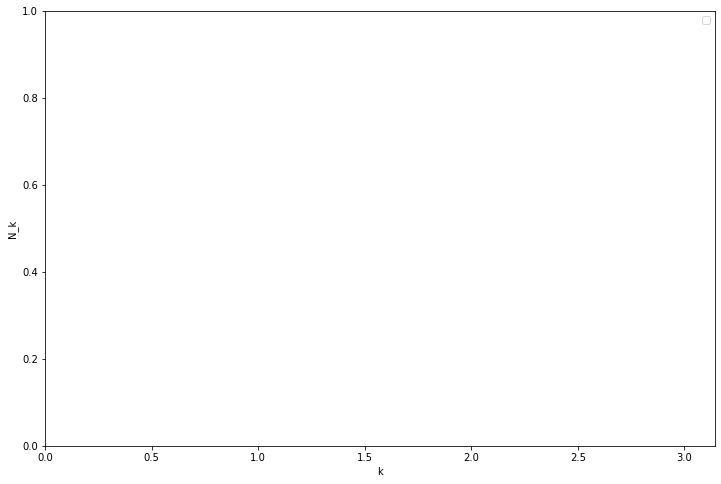

In [13]:
N_inds = ['N_{}'.format(i) for i in range(L)]

plt.figure(figsize=(12, 8))

for i, G in enumerate(Gs):
    if 0.95 < G*L/g_c < 1.05: # Only selecting within 2% of G_c
        plt.plot(k, output_df[N_inds].iloc[i], 
                label='g = {}'.format(np.round(G*L, 3)), # rounding the label to 3 decimal places
                 marker='o') # Putting a dot at each data point
plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.show()

At the actual critical coupling, it seems like Jorge's prediction of perfectly flat distribution is true, just not at the coupling he predicted.

To get a better sense of overall behavior, we can plot at a wider range of coupling. To make sure we don't end up with too many lines, I'll only plot once every 15 datapoints.

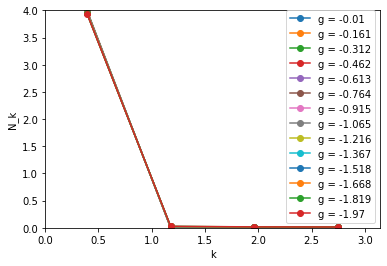

In [14]:
for i, G in enumerate(Gs):
    if i%15 == 0: # Only using indices that are multiples of 15
        plt.plot(k, output_df[N_inds].iloc[i], 
                label='g = {}'.format(np.round(G*L, 3)), # rounding the label to 3 decimal places
                 marker='o') # Putting a dot at each data point
plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.ylim(0, 4) # Limits on values of N_k = n_{k up} + n_{k down} + n_{-k up} + n_{-k down}
plt.show()

# Checking results with exact diagonalization

To use my exact-diagonalization code, you will need the [Quspin package](https://weinbe58.github.io/QuSpin/).
First, we import functions from my exact-diagonalization code and create a basis for ``Nup`` spin up and ``Ndown``
spin down fermions on a 1-d lattice with ``2L`` sites (since ``L`` counts only positive $k$):

In [62]:
from exact_diag import ham_op_2, find_nk, form_basis, casimir_dict, iom_dict, quantum_operator
basis = form_basis(2*L, Nup, Ndown)

Now, we create a Hamiltonian (as Quspin ``quantum_operator`` object) corresponding to our final coupling.

In [63]:
H = ham_op_2(L, G_final, k, basis=basis)

Symmetry checks passed!
Particle conservation check passed!


We can diagonalize this Hamiltonian. Let's do full diagonalization if the dimension of the Hilbert space is
less than 4000, and do sparse diagonalization to only get the 10 lowest-energy states if it's larger than that.

Dimension of the Hilbert space:
784


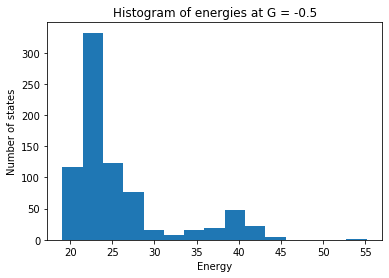

In [64]:
dim_h = basis.Ns
print('Dimension of the Hilbert space:')
print(dim_h)

if dim_h > 4000:
    exact_energies, exact_states = H.eigsh(k=10, which='SA') # k is number of states to find, SA means find the smallest algabraic eigenvalues
else:
    exact_energies, exact_states = H.eigh() # Full diagonalization of a Hermitian matrix
    
# Creating a histogram of the energies
plt.hist(exact_energies, bins=dim_h//50)
plt.xlabel('Energy')
plt.ylabel('Number of states')
plt.title('Histogram of energies at G = {}'.format(G_final))
plt.show()

Let's compare the ground state energy from ED to the final ground state energy from the RG equations:

In [180]:
print('ED ground state energy')
print(exact_energies[0]) 

print('RG ground state energy')
print(output_df['energy'].iloc[-1])

print('Difference')
print(exact_energies[0] - output_df['energy'].iloc[-1])

ED ground state energy
19.082828514842348
RG ground state energy
20.927698011780137
Difference
-1.8448694969377897


Now let's plot the difference between energies at various couplings.

Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conserv

ValueError: x and y must have same first dimension, but have shapes (160,) and (40,)

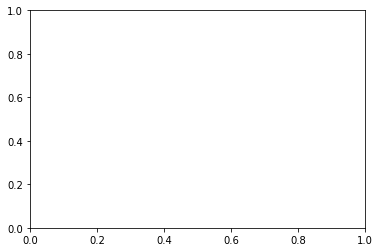

In [182]:
diffs = []
divisible_Gs = []
for i, G in enumerate(Gs):
    if i%5 == 0: # Only using indices that are multiples of 15
        h = ham_op_2(L, G, k, basis=basis)
        e, v = h.eigsh(k=1, which = 'SA') # we only need the 0th energy
        diffs += [e[0] - output_df['energy'].iloc[i]]
        divisible_Gs += [G]
         
plt.plot(divisible_Gs*L, diffs, marker='o')
plt.xlabel('GL')
plt.ylabel('Energy difference')
plt.ylim(-10**-12, 10**-12)
plt.show()

If you chose $GL < 0$, you should have noticed a drop in accuracy around $GL = 1.5$. This coincides with
a loss of accuracy in the integrals of motion

In [184]:
iom_inds = ['R_{}'.format(i) for i in range(4)]
which_iom = int(input('Index of IOM to check: '))
ground_ioms = [] # Exp. value of the IOM operator in the ground state
rg_ioms = [] # IOM eigenvalues from RG. Should be the same as "lowest_ioms"
Gss = []
for i, G in enumerate(Gs):
    if i%10 == 0: # Only using indices that are multiples of 10
        g = G/(1-G*np.sum(k))
        h = ham_op_2(L, G, k, basis=basis)
        e, v = h.eigsh(k=1, which = 'SA') # we only need the 0th energy
        v0 = v[:,0]
        i_d = iom_dict(L, g, k, k1=which_iom)
        i_o = quantum_operator(i_d, basis=basis)
        Gss += [G]
        print(i_o.matrix_ele(v0, v0))
        print(output_df[iom_inds[which_iom]].iloc[i])
        ground_ioms += [i_o.matrix_ele(v0, v0)]
        rg_ioms += [output_df[iom_inds[which_iom]].iloc[i]]

Index of IOM to check: 3
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(-0.0022924833008906133+0j)
-0.002292483300890612
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(-0.021937803984371045+8.673617379884035e-19j)
-0.021937803984371063
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(-0.03728478548990401+0j)
-0.03728478548990394
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
(-0.04958954512230545-3.469446951953614e-18j)
-0.04958954512230544
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermitic

Now, let's plot these values.

/Users/wholdhus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


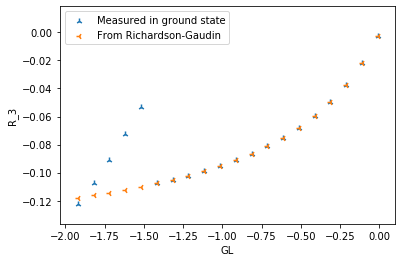

In [185]:
ground_ioms = np.array(ground_ioms)
rg_ioms = np.array(rg_ioms)
gss = np.array(Gss)*L
plt.scatter(gss, ground_ioms, label = 'Measured in ground state', marker = '2')
plt.scatter(gss, rg_ioms, label = 'From Richardson-Gaudin', marker='3')
plt.ylabel('R_{}'.format(which_iom))
plt.xlabel('GL')
plt.legend()

Strangely, if we form a Hamiltonian by just summing integrals of motion (which is equivalent to the Hamiltonian of study up to a constant that depend on $G$), we still agree!

p_k1, m_k1 = 4, 3
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 5, 2
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 6, 1
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 4, 3
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 5, 2
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 6, 1
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 7, 0
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 4, 3
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
p_k1, m_k1 = 5, 2
Hermiticity check passed!
Symmetry checks pass

Text(0.5, 1.0, 'Difference in $\\sum_k k R_k$')

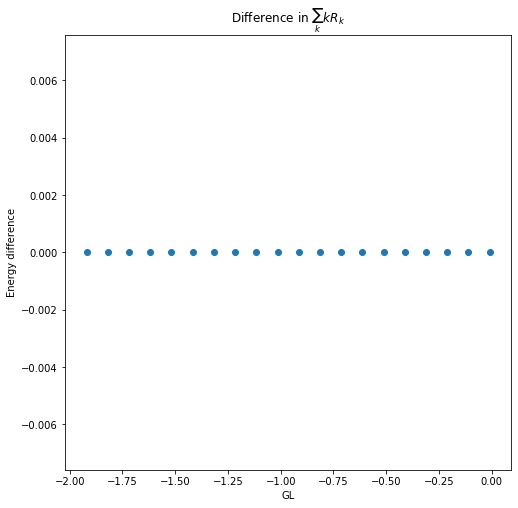

In [191]:
Gss = []
Ess_ed = []
Ess_rg = []
for i, G in enumerate(Gs):
    if i%10 == 0: # Only using indices that are multiples of 10
        g = G/(1-G*np.sum(k))
        for j in range(L):
            i_d = iom_dict(L, g, k, k1=j, mult=k[j]) # making operator k R_k
            i_o = quantum_operator(i_d, basis=basis)
            if j == 0:
                h = i_o # initializing Hamiltonian operator
            else:
                h += i_o # H = sum_k k R_k
        e, v = h.eigsh(k=1, which = 'SA')
        Ess_ed += [e[0]]
        Ess_rg += [np.sum(output_df[iom_inds].iloc[i] * k)]
        Gss += [G]
plt.figure(figsize=(8,8))
plt.scatter(np.array(Gss)*L, np.array(Ess_ed) - np.array(Ess_rg))
plt.xlabel('GL')
plt.ylabel('Energy difference')
plt.title('Difference in $\sum_k k R_k$')

Let's take a closer look at the plot:

(-1e-14, 1e-14)

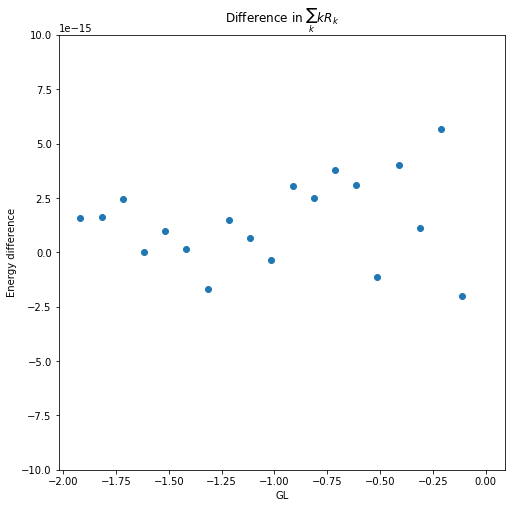

In [192]:
plt.figure(figsize=(8,8))
plt.scatter(np.array(Gss)*L, np.array(Ess_ed) - np.array(Ess_rg))
plt.xlabel('GL')
plt.ylabel('Energy difference')
plt.title('Difference in $\sum_k k R_k$')
plt.ylim(-10**-14, 10**-14)

So, this error doesn't come from us finding incorrect integrals of motion, it comes from the fact that the ground state of $\sum_k k R_k$ is no longer the ground state of the Hamiltonian with the additional ($G-dependent$) constant. This is because the Casimir operator, which also comes into play in that constant, has a different value for some excited states, ($-1$ instead of $3$, as will be seen below), and this induces those states to a lower energy as we increase $G$, causing a level crossing and 1st order phase transition!

## Phase transition in the repulsive case

There is an additional complication. If you happened to choose a repulsive coupling greater than $GL \approx 1.5$, you may have noticed a sudden drop in accuracy of the solutions. This appears to occur due to a change in the value of the Casimir operator
\begin{equation}
Q_k = \vec T_k^+ \cdot \vec T_{k'}^- + \vec T_k^- \cdot \vec T_k^+ + \vec S_k \cdot \vec S_k
+ \left(\frac{1}{2}N_k - 1\right)^2,
\end{equation}
as I will show after first demonstrating that there is an issue at this value of $GL$:

Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conserv

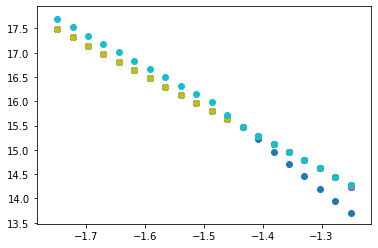

In [203]:
Gss = np.linspace(-1.25, -1.75, 20)/L
Ess = np.zeros((20, 20))
vss = [] # I'm going to save the states so  I don't have to keep diagonalizing things
for i, G in enumerate(Gss):
    h = ham_op_2(L, G, k, basis=basis)
    e, v = h.eigsh(k=20, which = 'SA') # we only need the 0th energy
    Ess[i,:] = np.sort(e)
    vss += [v]
for i in range(10): # Only plotting the first 10 energies because it ends up neater
    plt.scatter(Gss*L, Ess[:,i])

This is even stranger! It looks like a number of different states are becoming degenerate at a coupling around $GL = 1.5$! Let's plot this as lines with the same color, since the ordering seems to be getting scrambled (which gives makes the colors more or less useless).

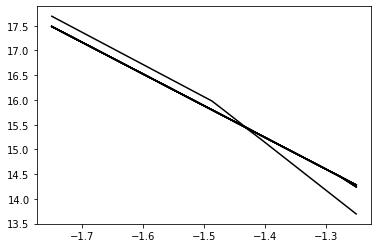

In [204]:
for i in range(10):
    plt.plot(np.array(Gss)*L, Ess[:,i], color='black')

This happens along with a change in the Casimir operator!

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


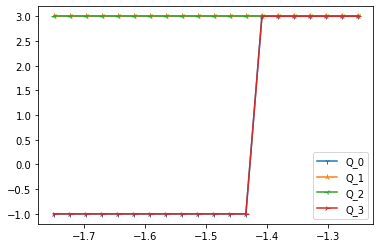

In [209]:
casimirs = np.zeros((20, 4))
# Forming a list of Casimir operators.
cdicts = [casimir_dict(4, i, 1.) for i in range(4)]
cops = [quantum_operator(cdicts[i], basis=basis) for i in range(4)]

for i, G in enumerate(Gss):
    # h = ham_op_2(L, G, k, basis=basis)
    # e, v = h.eigsh(k=1, which='SA') # Let's only deal with the ground state for now
    v0 = vss[i][:,0] # vss is a list of matrices, the columns of the matrices are the wavefunctions
    for j in range(4):
        casimirs[i, j] = cops[j].matrix_ele(v0, v0)
for j in range(4):
    plt.plot(Gss*L, casimirs[:, j], label = ('Q_{}'.format(j)), marker=markers[j])
plt.legend()

I'm not sure how to account for these changes. What if we stop dealing with the diagonal element in the Hamiltonian? Then, we could just define a Hamiltonian that doesn't have to have this additional constant. This won't change the attractive-coupling physics, since in that case the ground state wavefunction is unaffected (though the energy will be different).